In [3]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/__youtube_comments_6cXyQg_5uoc.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@TGuy123,"Just played it, wtf does lack of creativity me...",2024-10-26T11:15:42Z,0,0
1,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@hododod246,Good for people who doesn't understand video g...,2024-10-05T19:08:04Z,0,0
2,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@maksim3722,What a bunch of clowns at IGN…,2024-08-30T19:16:16Z,0,0
3,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@murtazarizvi368,cant believe how shitty the combat is in this ...,2024-07-02T04:43:46Z,0,1
4,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@heydude21687,Just started playing this game today and likin...,2024-05-28T08:03:54Z,0,1
...,...,...,...,...,...,...,...,...
2752,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@aditxd1,3rd in English,2016-05-11T07:01:09Z,0,0
2753,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@BZGFast,cyka,2016-05-11T07:00:42Z,0,0
2754,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@EthanBenard,gg,2016-05-11T07:00:09Z,0,0
2755,https://www.youtube.com/watch?v=6cXyQg_5uoc,Uncharted 4: A Thief's End Review,2016-05-11T06:58:30Z,@norteno149,1st in English,2016-05-11T06:59:52Z,0,0


In [5]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game",
     "review", "game", "score", "played", "time", "getting", "gaming", "worth", 
    "buying", "guys", "true", "help","look","first","lol","better","one",
    "give","enough","ever","wait""gon","going","let","word","gon",
    "link", "game", "review", "watching", 
    "check", "playing", "games", "please", "someone", "name","breath","gave"
    "uncharted", "thief", "end", "people", "started", "today", 
    "liking", "combat", "shitty", "IGN", "clowns", "believe", "creativity", "wtf"
    "uncharted","whats","third","gave","act", "butthurt", "nothing", "agree", "problem", 
    "hate", "best", "wtf", "ten", "imagination", "series", "lack", "dislike", "many", "would", 
    "call", "fair", "great", "want", "guy", "goty", "long", "isnt", "reviewer", "deserves", "raider", 
    "tomb", "girl", "bar", "graphic", "least"
    
    

])
lmtzr = WordNetLemmatizer()

In [6]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [7]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
1385,2016-05-18,"just finished it, I thought the pacing was gr...",finished thought pacing great agree
1386,2016-05-18,"OMG a 9/10, this person is totally hating on t...",omg 910 person totally hating game quick let s...
1387,2016-05-18,this video should have more dislikes than COD IW,dislike cod
1388,2016-05-18,9.0 are u kidding this game should have a mas...,kidding game masterpiece
1389,2016-05-18,This game deserves an 8 at best. While not a b...,game deserves best bad franchise uncharted ter...
...,...,...,...
2752,2016-05-11,3rd in English,3rd english
2753,2016-05-11,cyka,cyka
2754,2016-05-11,gg,
2755,2016-05-11,1st in English,1st english


In [8]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [9]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['comment'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2016-05-15,just finish the game i must said this woman sh...,game must said woman shouldnt game ever,neutral
1,2016-05-11,Why did Lucy O'brien cross the road? I don't k...,lucy obrien cross road kitchen,neutral
2,2016-05-17,IGN you guys are idiots for this,guy idiot,neutral
3,2016-05-11,Considering you started the review with a pret...,considering started pretty negative view annoy...,negative
4,2016-05-11,This game is repetitive since the first one. W...,game repetitive since first one who surprised ...,negative
...,...,...,...,...
495,2016-05-11,"Wait, so campaign doesnt run at 60FPS flat? @ ...",wait campaign doesnt run 60fps flat 540,neutral
496,2016-05-18,Now this is a well made game' unlike Homefront...,game unlike homefront,positive
497,2016-05-11,Tomb raider didnt have multiplayer so basicly ...,tomb raider multiplayer basicly uncharted tomb...,positive
498,2016-05-11,But does it have fish a.i.,fish,neutral


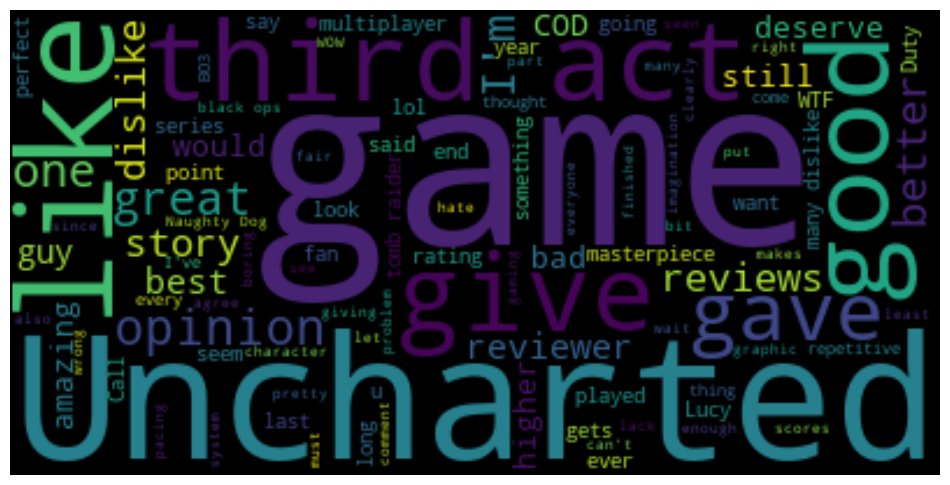

In [10]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

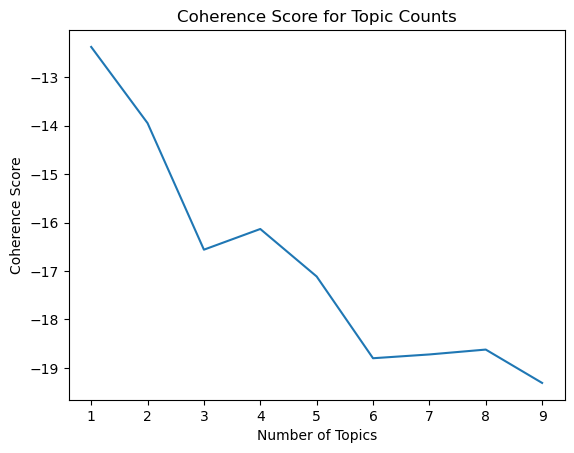

In [11]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [12]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.007*"ops" + 0.007*"black" + 0.006*"thought" + 0.005*"advanced" + 0.005*"saw" + 0.005*"warfare" + 0.004*"masterpiece" + 0.004*"uncharted" + 0.003*"cod" + 0.003*"duty"'), (1, '0.011*"bad" + 0.009*"uncharted" + 0.006*"worst" + 0.006*"seems" + 0.005*"still" + 0.005*"gamespot" + 0.004*"less" + 0.004*"said" + 0.003*"igns" + 0.003*"opinion"'), (2, '0.007*"bloated" + 0.005*"uncharted" + 0.005*"story" + 0.004*"amazing" + 0.004*"say" + 0.004*"opinion" + 0.003*"clearly" + 0.003*"drake" + 0.003*"yes" + 0.003*"last"'), (3, '0.019*"uncharted" + 0.005*"cod" + 0.005*"stupid" + 0.004*"greg" + 0.004*"wow" + 0.004*"lucy" + 0.004*"higher" + 0.003*"disliking" + 0.003*"miss" + 0.003*"fan"')]


The coherence score continues to decline beyond 4 topics, so 4 topics strikes a good balance.

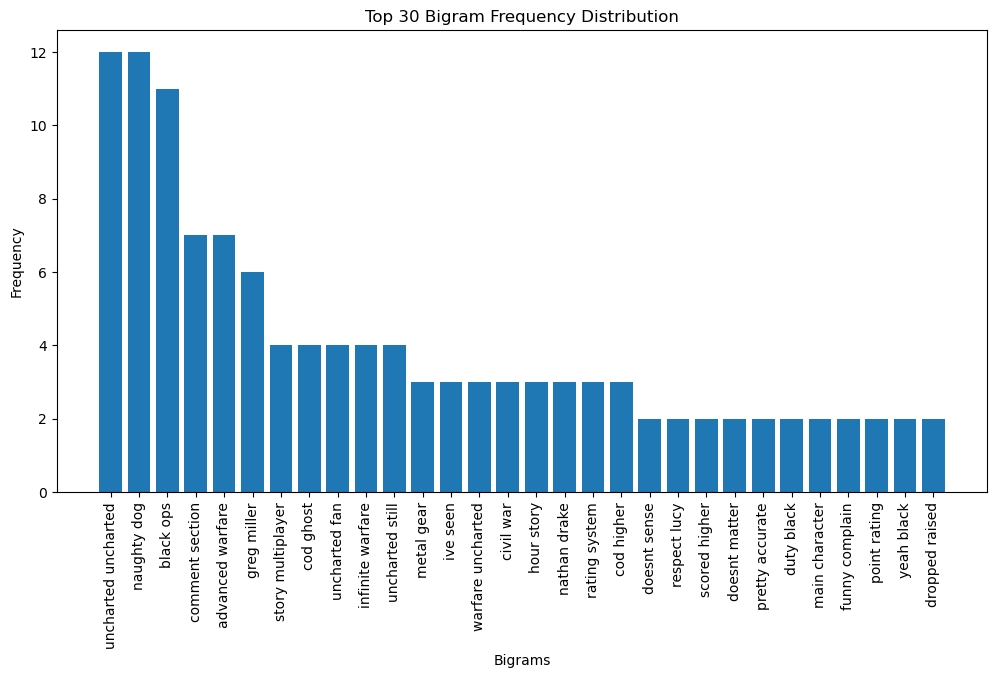

In [14]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [15]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
3,Apex Legends - Before You Buy,2
4,PlayerUnknown's Battlegrounds (PS4) - Before Y...,4
5,Final Fantasy 7 Rebirth Review,4
6,Super Mario Bros. Wonder Review,4
7,Red Dead Redemption 2 Review,6
8,The Legend of Zelda: Tears of the Kingdom Review,6
9,Uncharted 4: A Thief's End Review,4
